In [1]:
import csv

def read_file(x):
    with open(x, 'r', encoding='UTF-8') as file:
        data_list = []
        csv_reader = csv.reader(file, delimiter = ';')
        for rad in csv_reader:
            data_list.append(rad)
        return data_list

file1 = 'kpi-1.csv'                                     
kpiData = read_file(file1)   

Visa KPI för månad (1-12): 11


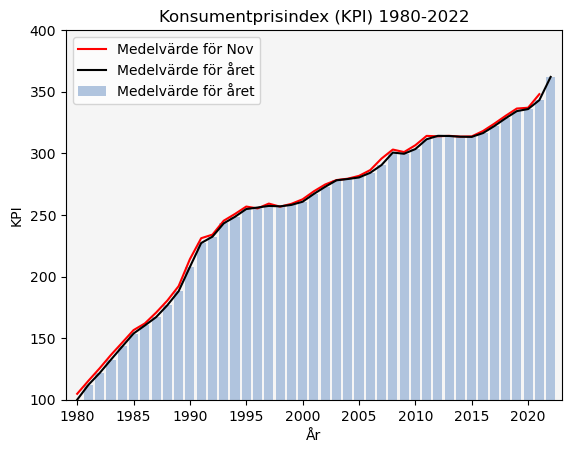

In [12]:
import matplotlib.pyplot as plt

# Nedan: en funktion för summering av tal i lista

def summering(x):
    s = 0.0
    for rad in x:
        s = s + rad
    return s

# Nedan: en funktion för medelvärdesberäkning av tal i lista

def medelvardesberakning(x):
    s = summering(x)                                              # använder summering() så kod blir kortare och mer lättläst
    m = s / len(x)
    return m

def kpi_medelvarde(lista):
    
    # Nedan: cheats
    
    global kpiData
    
    # Nedan: gör värden till floats och årtal till integers
    
    kpi = []                                                      # //////////////// if shallow copy påverkas nog deluppg 5
    for rad in lista:
        kpi.append(rad)
    for rad in range(1, len(kpi)):                                # För att slippa att konvertera i varje rad senare \
        kpi[rad][0] = int(kpi[rad][0])                            #  formaterar jag string, integer och float redan här
        for kolumn in range(1, len(kpi[rad])):
            kpi[rad][kolumn] = float(kpi[rad][kolumn])
    
    # Nedan: skapar en ny lista efter inmatad månad
    
    vald_manad = int(input('Visa KPI för månad (1-12): '))
    data_vald_manad = []
    for rad in kpi[1:]:
        if vald_manad < len(rad):
            data_vald_manad.append(rad[vald_manad])
    data_vald_manad.reverse()
            
    # Nedan: en lista med medelvärden för varje år
    
    medelvarde_per_ar = []
    for rad in range(1, len(kpi)):
        varden = kpi[rad][1:]
        medelvarde = medelvardesberakning(varden)
        medelvarde_per_ar.append(medelvarde)
    medelvarde_per_ar.reverse()                                   # omvänd lista för att få en positiv trend i grafen
    
    # Nedan: en graf över prisutvecklingen
    
    artal = []                                                    # plockar ut årtalen ur listan för att använda som x-axel
    for rad in range(1, len(kpi)):
        artal.append(kpi[rad][0])
    artal.reverse()
    
    manader = kpi[0]                                              # plockar ut månaderna för plt.legend
    manader.append(kpi[0])
    manad_label = f'Medelvärde för {manader[vald_manad]}'
    
    if len(artal) != len(data_vald_manad):
        plt.plot(artal[:-1], data_vald_manad, color = 'red', label = manad_label)
    else:
        plt.plot(artal, data_vald_manad, color = 'red', label = manad_label)
    plt.plot(artal, medelvarde_per_ar, color = 'k', label = 'Medelvärde för året')
    plt.bar(artal, medelvarde_per_ar, color = 'lightsteelblue', label = 'Medelvärde för året')
    
    plt.ylim(100, 400)
    plt.xlim(1979, 2023)
    plt.title('Konsumentprisindex (KPI) 1980-2022')
    plt.xlabel('År')
    plt.ylabel('KPI')
    b = plt.gca()
    b.set_facecolor('whitesmoke')
    plt.legend()
    plt.show()
    
    # Nedan: cheats
    
    kpiData = read_file('kpi-1.csv')

kpi_medelvarde(kpiData)

# Deluppgift 2 från inlämningen

In [ ]:
m = int(input('Visa KPI för månad (1-12): '))

# Nedan: en endimensionell lista med alla värden från kolumnen av den månad som användaren anger. 

kpiData_man = []
ca = 0                                                 
cb = 1                                                 # "c" för clock, "a"/"b" för att särskilja på två olika räknare
for rad in kpiData:
    if m < 8:                                           
        ca = ca + 1                                    # Eftersom jag ger c ett nytt värde redan innan första loopen så \ 
        kpiData_man.append(kpiData[ca][m])             #  undviker jag elementet i första raden (månadens namn)
        if ca > 42:
            break                                           
    if m >= 8:                                               
        cb = cb + 1
        kpiData_man.append(kpiData[cb][m])
        if cb > 42:
            break                                            

kpiData_man = [float(kpiDM) for kpiDM in kpiData_man]  # List comprehension för att göra listans element till floats

# Nedan: en lista med medelvärden för varje år

del kpiData[0]                                         # Ta bort månaderna
for i in range(len(kpiData)):                          # Ta bort årtalen
    for j in range(0, 1):
        del (kpiData[i][j])

for i in kpiData:                                      # Konvertera all data till floats. \
    for j, k in enumerate(i):                          #  Detta tog mig lång tid att lösa, finns det bättre sätt?
        i[j] = float(k)

kpiData_ar = [medel(x) for x in kpiData]

# Nedan: själva grafen

import matplotlib.pyplot as plt
import numpy as np

kpiData_man.reverse()                                 # Reverse för att grafen ska visa en positiv trend. \
kpiData_ar.reverse()                                  #  Det finns säkert ett bättre sätt? 

plt.ylim(50, 400)
x = np.linspace(1980, 2022, 43)
xM = np.linspace(1980, 2022, 42)                      # Fick ej plt.xlim eller linspace att funka likvärdigt pga år 2022 \
if len(kpiData_man) == 43:                            #  som inte innehåller värden för alla månader. 
    xM = x

plt.plot(xM, kpiData_man, color = 'red', label = 'Medelvärde för vald månad')
plt.plot(x, kpiData_ar, color = 'k', label = 'Medelvärde för året')
plt.bar(x, kpiData_ar, color = 'lightsteelblue', label = 'Medelvärde för året')

plt.title('Konsumentprisindex (KPI) 1980-2022')
plt.xlabel('År')
plt.ylabel('KPI')
b = plt.gca()
b.set_facecolor('whitesmoke')
plt.legend()
plt.show()

# WIP

In [ ]:
# Ta bort första raden och kolumen då de inte innehåller nödvändiga värden.  

del kpiData[0]

for i in range(len(kpiData)):
         for j in range(0, 1):
             del (kpiData[i][j])


In [ ]:
#      kpiData = [['350.56', '353.56', '359.8', '362.02', '365.82', '370.95', '371.28'], ['338.09', '339.01', '339.54', '340.37', '341.04', '341.32', '342.23', '343.99', '345.74', '346.44', '348.03', '352.47'], ['332.82', '334.47', '333.91', '332.9', '334.91', '336.84', '337.57', '337.07', '337.27', '336.97', '337', '339.34'], ['328.56', '331.02', '331.79', '334.11', '334.95', '334.47', '335.8', '334.39', '335.95', '336.04', '336.36', '337.68'], ['322.51', '324.87', '325.76', '327.1', '327.86', '328.62', '330.33', '329.63', '331.14', '330.72', '330.4', '331.87'], ['317.5', '319.73', '319.68', '321.54', '321.74', '321.97', '323.69', '323.18', '323.62', '323.38', '324.04', '325.23'], ['313.13', '314.14', '315.7', '315.64', '316.21', '316.54', '316.73', '316.38', '316.91', '318', '318.1', '319.68'], ['310.75', '312.93', '313.19', '313.16', '314.24', '313.33', '313.43', '312.81', '314.06', '314.29', '313.75', '314.21'], ['311.39', '312.7', '312.68', '313.89', '314.05', '314.7', '313.67', '313.35', '313.85', '314.02', '313.56', '314.05'], ['312', '313.39', '314.65', '314.03', '314.54', '313.99', '313.55', '313.84', '315.05', '314.4', '314.2', '315.04'], ['311.85', '313.92', '314.8', '315.49', '315.23', '314.45', '313.23', '313.55', '314.81', '314.59', '313.82', '314.61'], ['306.15', '308.02', '310.11', '311.44', '312.02', '311.28', '311.13', '311.23', '313.41', '313.42', '314.16', '314.78'], ['299.79', '301.59', '302.32', '302.36', '302.92', '302.97', '302.04', '302.06', '304.6', '305.57', '306.58', '308.73'], ['297.88', '297.95', '298.8', '299.26', '299.45', '300.17', '298.8', '299.42', '300.35', '301.11', '301.03', '301.69'], ['294.09', '295.28', '298.08', '299.67', '300.99', '302.45', '302.11', '301.98', '305.08', '305.56', '303.06', '298.99'], ['285.01', '286.45', '288.33', '289.79', '289.48', '289.95', '289.49', '289.41', '292.3', '293.85', '295.75', '296.32'], ['279.59', '280.9', '282.89', '284.32', '284.76', '284.68', '284.19', '284.38', '286.04', '286.07', '286.43', '286.43'], ['277.9', '279.2', '279.8', '280.2', '280.3', '280.4', '279.4', '279.9', '281.9', '282.4', '281.7', '281.8'], ['278', '277.3', '279.4', '279.4', '280.1', '278.9', '278.5', '278.2', '280.2', '281', '279.4', '279.4'], ['276', '278.4', '279.8', '278.8', '278.5', '277.7', '276.8', '276.7', '278.7', '278.9', '278.3', '278.6'], ['268.8', '269.4', '271.8', '272.9', '273.6', '273.2', '272.3', '272.4', '274.5', '275.4', '274.7', '275.1'], ['261.7', '262.6', '264.6', '266.9', '268.7', '268.3', '266.9', '267.6', '269.9', '269.1', '269.2', '269.5'], ['257.5', '258.7', '259.9', '260', '261.3', '261.2', '260', '260.2', '262', '262.6', '262.7', '262.5'], ['256.2', '256.3', '257.3', '257.9', '258.3', '258.7', '257.6', '257.6', '259.4', '259.7', '259', '259.6'], ['256.9', '256.6', '257', '257.7', '258.1', '257.6', '257', '255.7', '256.8', '257.3', '256.7', '256.2'], ['254.6', '254.2', '255.2', '257', '257', '257.4', '257.3', '257.4', '259.8', '259.6', '259.2', '259.1'], ['255.6', '255.8', '257', '257.6', '257.3', '256.3', '255.7', '254.5', '256', '255.9', '255.3', '254.9'], ['251.3', '252.3', '253.3', '255', '255.3', '255.1', '254.8', '254.5', '256.2', '256.9', '256.8', '256'], ['245.1', '245.9', '246.8', '247.8', '248.3', '248.4', '248.4', '248.5', '250.7', '251', '250.8', '250.4'], ['241', '241.6', '242.7', '243.7', '243.1', '242.3', '241.9', '242.3', '244.5', '245.2', '245.3', '244.3'], ['230.2', '230.3', '231.3', '231.9', '232', '231.5', '231.2', '231.3', '234.6', '235.1', '234', '234.9'], ['218.9', '225', '225.8', '227.1', '227.3', '227', '227.1', '226.7', '229.2', '230.1', '231.1', '230.8'], ['199', '199.9', '205.4', '205.2', '206.4', '206.2', '208.2', '209.6', '212', '213.4', '214.1', '213.9'], ['183', '184', '184.7', '186.5', '187.3', '187.9', '187.9', '188.7', '190.2', '191.8', '192.2', '192.8'], ['171.6', '172.9', '173.7', '175.2', '175.8', '176.3', '177.1', '177.5', '178.8', '180.2', '180.5', '180.9'], ['164.4', '164.4', '164.7', '165.1', '165.2', '164.9', '166.9', '167.8', '169.4', '170.1', '170.7', '170.7'], ['158.9', '159', '158.7', '159.7', '159.7', '159.7', '160.1', '159.9', '161.3', '161.9', '161.9', '162.3'], ['149.6', '151', '152.1', '152.7', '154.5', '153.9', '153.8', '153.8', '154.5', '155.5', '156.5', '157.1'], ['139.4', '138.9', '140.9', '141.8', '142.8', '142.4', '142.8', '143.9', '144.8', '145.5', '146.4', '148.8'], ['129.1', '128.8', '129.3', '130.3', '131.1', '131.8', '132.9', '133.5', '134.5', '135.6', '136.4', '137.5'], ['117.4', '119', '119.3', '120.1', '120.7', '121.1', '121.9', '122.2', '122.9', '124.6', '125.6', '125.9'], ['107.2', '109.3', '109.8', '110.5', '111.2', '111.6', '112.6', '113.5', '114.3', '115', '115.4', '114.9'], ['95.3', '96.8', '97.2', '97.9', '98.2', '98.5', '99.3', '99.9', '102.7', '104.2', '104.8', '105.2']]

In [ ]:
# Göra om kpiData till floats

kpiDataFloats = []

# Gör element 0 (2022-års data) till en float först och lägg till i listan pga färre månader. 
kpiData0 = [float(x) for x in kpiData[0]] 
kpiDataFloats.append(kpiData0)

# Gör övriga år till floats
del kpiData[0]

for a in range(len(kpiData)):
    for b in range(len(kpiData)):
        if b < 12:
            kpiData[a][b] = float(kpiData[a][b])

kpiData.reverse()
kpiData.append(kpiDataFloats)
kpiData.reverse()

print(kpiData)                                          # Av någon anledning har första elementet flera hakparenteser runt sig vilket förstör möjligheten att summera helheten

In [ ]:
# Summering och medelvärde för 2022 som har färre antal värden än övriga årtal. 
A22 = kpiData.pop(0)
Ar22 = A22.pop(0)
print(Ar22)
fAr22 = [sum(x) for x in Ar22]
#placeholder = fAr22
#Ar22 = placeholder
#print(Ar22)

# Summering och medelvärde för övriga årtal. 
#kpiDataAr = [sum(x) for x in kpiData]


In [ ]:
# Problemet ovan är nu att:
# Första elementet i kpiData har flera hakparenteser vilket gör att jag inte kan summera den. TROR JAG. 
# Sedan måste jag summera övriga element men float is not iterable så jag kan inte summera. 